In [28]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = pd.DataFrame(wine_quality.data.original)
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [53]:
# List of columns to drop
# cols_to_drop = ['fixed_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'color', 'quality']

# # Dropping the specified columns
# X = df.drop(columns=cols_to_drop)
X = df['sulphates']
#df1 = pd.DataFrame(wine_quality.data.original)
#y = df1['quality']
y = df['quality']

In [54]:
#Creating the function for batch gradient descent
def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 #parameters
    log, mse = [], [] #lists to store learning
    N = len(X) #number of samples
    
    for __ in range(epoch):
        f = y - (m * X + b)
        
        #update m and b
        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

MSE: 1.0334927701622951


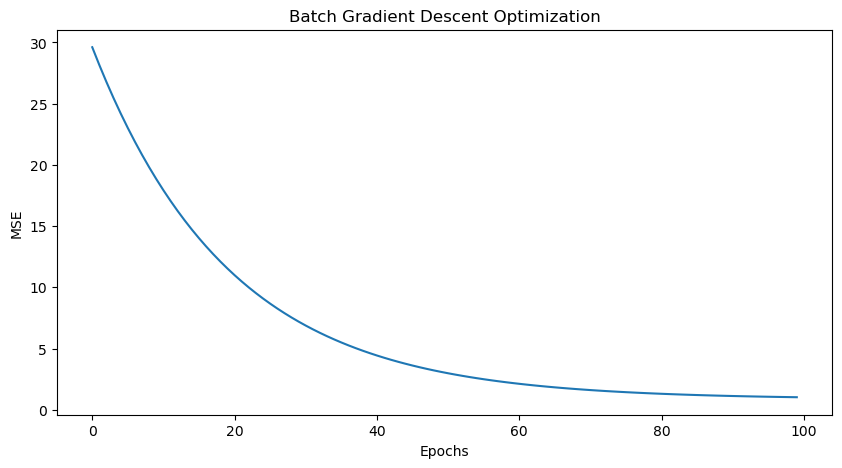

In [55]:
#Running the model
m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 100)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Batch Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [56]:
def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 10, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

MSE: 1.0317251944849548


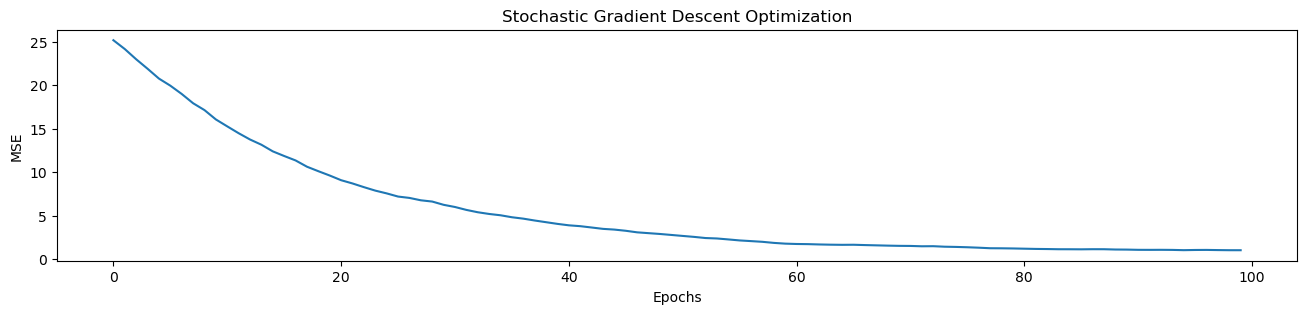

In [57]:
#Running the model
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.01, epoch = 100, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('Stochastic Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()